## Knowing the what, but not the where in Bayesian optimization. Vu Nguyen, Michael Osborne. ICML 2020

# Black-box optimization given the knowledge of the optimum value
\begin{align}
f^* = argmax_{x \in \mathcal{X}} f(x)
\end{align}

# Contact: Vu Nguyen, vu@ieee.org


In [1]:
import sys
sys.path.insert(0,'..')
sys.path.insert(0,'../..')

from bayes_opt import BayesOpt_KnownOptimumValue,BayesOpt
import numpy as np
from bayes_opt import vis_ERM,functions
import warnings
warnings.filterwarnings("ignore")


# Transforming the surrogate function go below the optimum value $f*$


y_lcb=[[-4.23420521]] y_ucb=[[2.12924872]] fstar_scaled=1.734493


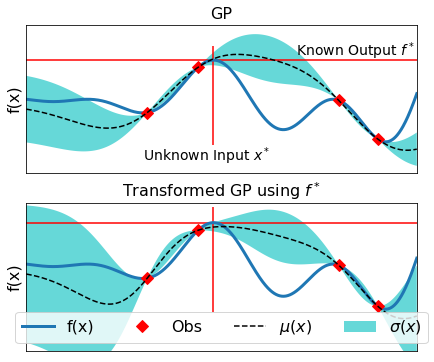

In [2]:
myfunction=functions.fourier(sd=0)
# myfunction.func: contains the black-box function
# myfunction.bounds: contains the SearchSpace
# myfunction.fstar: contains the known optimum value

# four initial points
x0=[3.1,4.4,8,9]

init_X=np.reshape(x0,(len(x0),1))
init_Y=myfunction.func(init_X)



# create an empty object for BO using GP
acq_name='ei'
bo=BayesOpt(myfunction.func,myfunction.bounds,acq_name=acq_name,verbose=0)
bo.init_with_data(init_X=init_X,init_Y=init_Y)



# create an empty object for BO using transformed GP
acq_name='erm'
IsTGP=1 # using transformed GP
bo_tgp=BayesOpt_KnownOptimumValue(myfunction.func,myfunction.bounds,fstar=myfunction.fstar, \
                                  acq_name=acq_name,IsTGP=1)
bo_tgp.init_with_data(init_X=init_X,init_Y=init_Y)




vis_ERM.plot_1d_Fourier_GP_TGP(bo,bo_tgp,fstar=myfunction.fstar)

# Transforming the surrogate function closer to the optimum value $f*$

y_lcb=[[-3.78392574]] y_ucb=[[2.26069113]] fstar_scaled=2.454989
ZeroMean


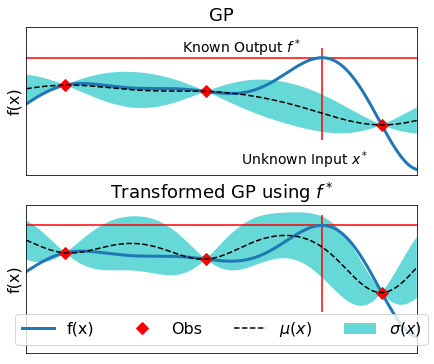

In [3]:
myfunction=functions.forrester(sd=0)
# myfunction.func: contains the black-box function
# myfunction.bounds: contains the SearchSpace
# myfunction.fstar: contains the known optimum value

# initial 3 points
x0=[0.1,0.46,0.91]

init_X=np.reshape(x0,(len(x0),1))
init_Y=myfunction.func(init_X)


# create an empty object for BO using  vanilla GP
acq_name='ei'
bo=BayesOpt(myfunction.func,myfunction.bounds,acq_name=acq_name,verbose=0)
bo.init_with_data(init_X=init_X,init_Y=init_Y)

# create an empty object for BO using transformed GP
acq_name='erm'
IsTGP=1 # using TransformedGP
bo_tgp=BayesOpt_KnownOptimumValue(myfunction.func,myfunction.bounds,fstar=myfunction.fstar, \
                                  acq_name=acq_name,IsTGP=1,verbose=0)
bo_tgp.init_with_data(init_X=init_X,init_Y=init_Y)

vis_ERM.plot_1d_Forrester_GP_TGP(bo,bo_tgp,fstar=myfunction.fstar)


# demonstrating different acquisition functions given known optimum value 

y_lcb=[[-4.37405329]] y_ucb=[[2.13140421]] fstar_scaled=1.729925


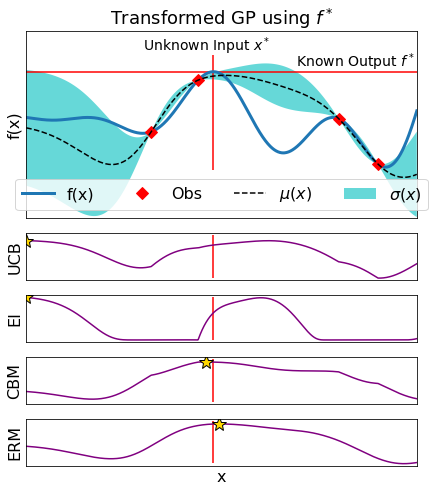

In [7]:
myfunction=functions.fourier(sd=0)
# myfunction.func: contains the black-box function
# myfunction.bounds: contains the SearchSpace
# myfunction.fstar: contains the known optimum value
    
    

x0=[3.2,4.4,8,9]
init_X=np.reshape(x0,(len(x0),1))
init_Y=myfunction.func(init_X)

# create an empty object for BO using transformed GP
acq_name='erm'
IsTGP=1


bo_tgp=BayesOpt_KnownOptimumValue(myfunction.func,myfunction.bounds,fstar=myfunction.fstar, \
                                  acq_name=acq_name,IsTGP=IsTGP)
bo_tgp.init_with_data(init_X=init_X,init_Y=init_Y)

NN=1*myfunction.input_dim
for index in range(0,NN):
    vis_ERM.plot_acq_bo_1d_tgp(bo_tgp,fstar=myfunction.fstar)

# Running multiple iterations
# using vanilla GP

estimated lengthscale [0.17110605]
estimated lengthscale [0.02470379]


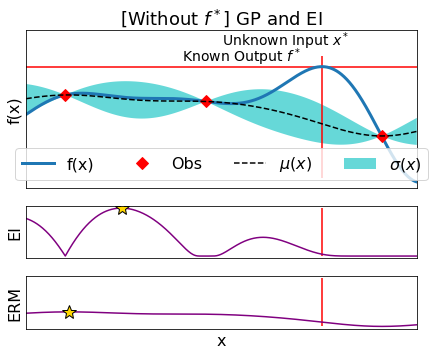

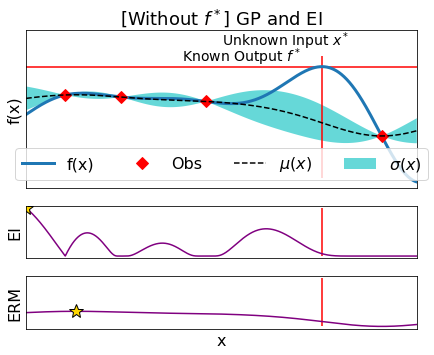

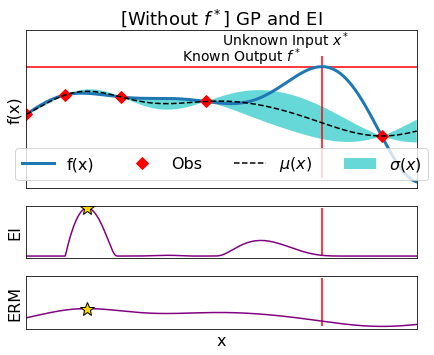

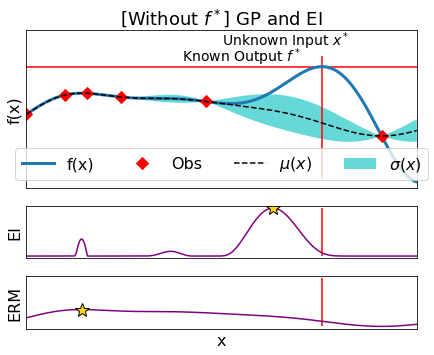

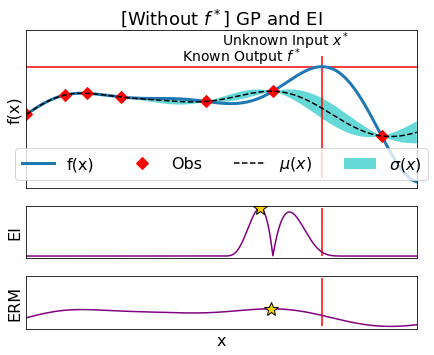

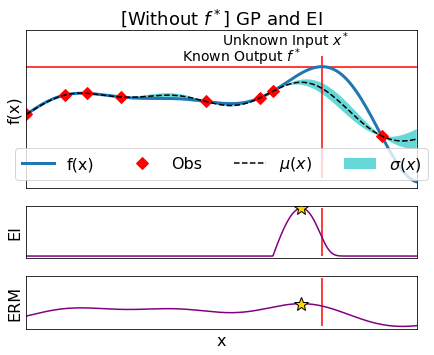

In [9]:
myfunction=functions.forrester(sd=0)


x0=[0.1,0.46,0.91]
init_X=np.reshape(x0,(len(x0),1))
init_Y=myfunction.func(init_X)



# create an empty object for BO using vanilla GP
acq_name='ei'
bo=BayesOpt(myfunction.func,myfunction.bounds,acq_name=acq_name,verbose=1)
bo.init_with_data(init_X=init_X,init_Y=init_Y)

vis_ERM.plot_1d_Forrester_EI_ERM(bo,fstar=myfunction.fstar)


# number of recommended parameters
NN=5*myfunction.input_dim
for index in range(0,NN):
    xt=bo.select_next_point()
    vis_ERM.plot_1d_Forrester_EI_ERM(bo,fstar=myfunction.fstar)

# Running multiple iterations
# using Transformed GP and ERM

y_lcb=[[-3.78392574]] y_ucb=[[2.26069113]] fstar_scaled=2.454989
ZeroMean
max ERM [0.66066066]
estimated lengthscale [0.17110574]
[0.66082363]
y_lcb=[[-2.56049615]] y_ucb=[[2.32780749]] fstar_scaled=1.928230
max ERM [0.]
[0.64216052]
y_lcb=[[-5.46746004]] y_ucb=[[2.20886428]] fstar_scaled=1.866056
max ERM [0.72772773]
[0.72819691]
y_lcb=[[-9.24052678]] y_ucb=[[1.51200072]] fstar_scaled=1.404896
max ERM [0.77377377]
estimated lengthscale [0.01288671]
[0.77395717]
y_lcb=[[-5.86933608]] y_ucb=[[1.3919225]] fstar_scaled=1.162073
max ERM [0.76376376]
[0.7636219]
y_lcb=[[-402.72755307]] y_ucb=[[1.0024543]] fstar_scaled=1.007373
ZeroMean
max ERM [0.92192192]


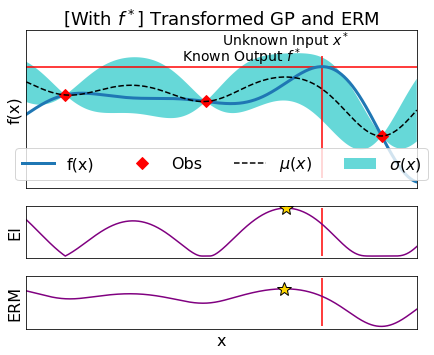

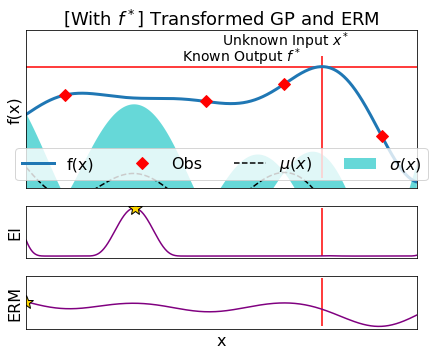

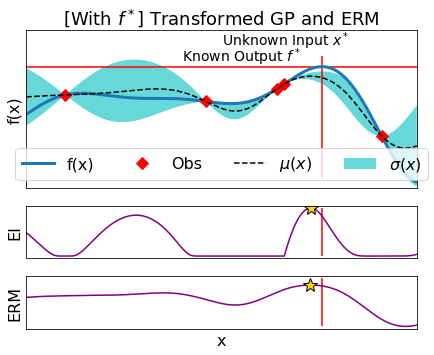

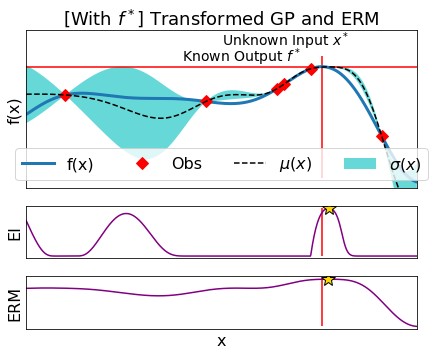

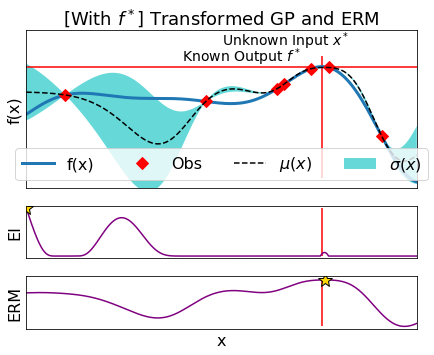

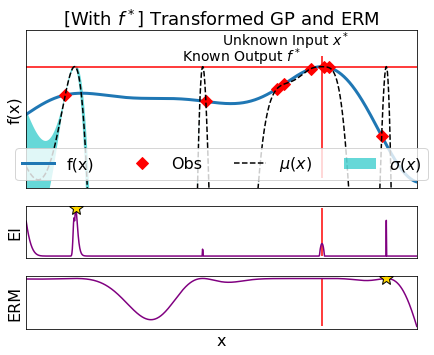

In [10]:
myfunction=functions.forrester(sd=0)


x0=[0.1,0.46,0.91]
init_X=np.reshape(x0,(len(x0),1))
init_Y=myfunction.func(init_X)


# create an empty object for BO using transformed GP
acq_name='erm'
IsTGP=1 # using Transformed GP

bo_tgp=BayesOpt_KnownOptimumValue(myfunction.func,myfunction.bounds,fstar=myfunction.fstar, \
                              acq_name=acq_name,IsTGP=IsTGP,verbose=1)
bo_tgp.init_with_data(init_X=init_X,init_Y=init_Y)

vis_ERM.plot_1d_tgp_Forrester_EI_ERM(bo_tgp,fstar=myfunction.fstar)


NN=5*myfunction.input_dim
for index in range(0,NN):
    xt=bo_tgp.select_next_point()
    print(bo_tgp.X_ori[-1])

    vis_ERM.plot_1d_tgp_Forrester_EI_ERM(bo_tgp,fstar=myfunction.fstar)
    